In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# load the csv file you downloaded
df = pd.read_csv("ab_test_results.csv")

# quick preview
print(df.shape)
df.head()


(10000, 3)


,user_id,group,converted
0,1,A,0
1,2,A,1
2,3,A,0
3,4,A,0
4,5,A,0


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    10000 non-null  int64 
 1   group      10000 non-null  object
 2   converted  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


user_id      0
group        0
converted    0
dtype: int64

In [4]:
df.describe(include='all')


,user_id,group,converted
count,10000.00000,10000,10000.000000
unique,NaN,2,NaN
top,NaN,A,NaN
freq,NaN,5000,NaN
mean,5000.50000,NaN,0.104600
std,2886.89568,NaN,0.306053
min,1.00000,NaN,0.000000
25%,2500.75000,NaN,0.000000
50%,5000.50000,NaN,0.000000
75%,7500.25000,NaN,0.000000


In [5]:
df['group'].value_counts(normalize=True)


group
A    0.5
B    0.5
Name: proportion, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_21976\527827544.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='group', y='converted', data=df, ci=False)


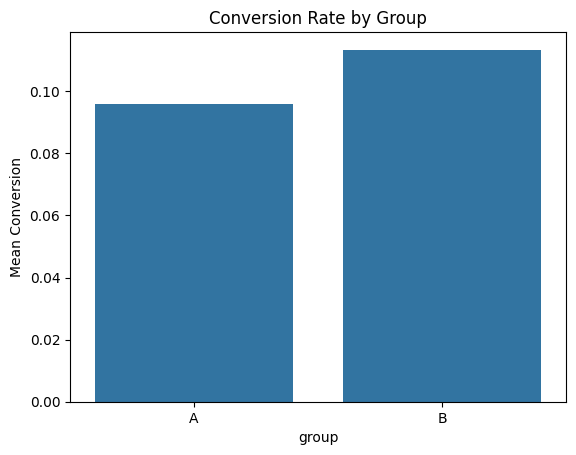

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='group', y='converted', data=df, ci=False)
plt.title('Conversion Rate by Group')
plt.ylabel('Mean Conversion')
plt.show()


In [7]:
conversion_rates = df.groupby('group')['converted'].mean()
print(conversion_rates)


group
A    0.0958
B    0.1134
Name: converted, dtype: float64


In [8]:
import numpy as np
import scipy.stats as stats

# number of conversions and totals for each group
success_a = df[df['group'] == 'A']['converted'].sum()
success_b = df[df['group'] == 'B']['converted'].sum()

n_a = df[df['group'] == 'A'].shape[0]
n_b = df[df['group'] == 'B'].shape[0]

p_a = success_a / n_a
p_b = success_b / n_b

print(f"Group A conversion rate: {p_a:.3f}")
print(f"Group B conversion rate: {p_b:.3f}")


Group A conversion rate: 0.096
Group B conversion rate: 0.113


In [9]:
# pooled probability
p_pool = (success_a + success_b) / (n_a + n_b)

# standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_a + 1/n_b))

# z-score
z = (p_b - p_a) / se

# two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Z-score: {z:.3f}")
print(f"P-value: {p_value:.4f}")


Z-score: 2.875
P-value: 0.0040


In [10]:
alpha = 0.05  # significance level (5%)

if p_value < alpha:
    print("✅ Reject the Null Hypothesis — there is a statistically significant difference!")
else:
    print("❌ Fail to Reject the Null Hypothesis — no significant difference detected.")


✅ Reject the Null Hypothesis — there is a statistically significant difference!


C:\Users\USER\AppData\Local\Temp\ipykernel_21976\3402025480.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='group', y='converted', data=df, ci=95)


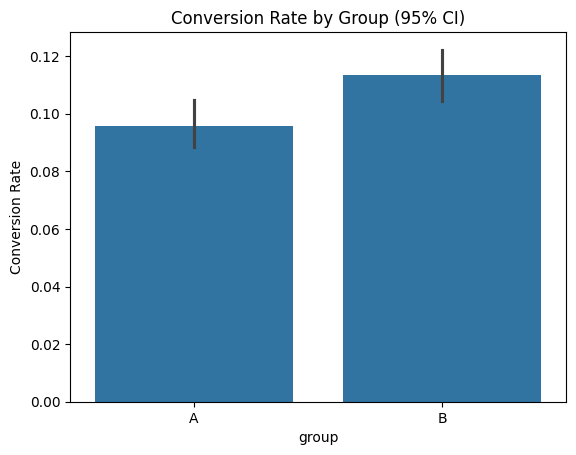

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='group', y='converted', data=df, ci=95)
plt.title('Conversion Rate by Group (95% CI)')
plt.ylabel('Conversion Rate')
plt.show()
